In [1]:
import os
import glob
import cv2
import numpy as np
import torch
from google.colab.patches import cv2_imshow

In [2]:
!git clone https://github.com/xinntao/ESRGAN

Cloning into 'ESRGAN'...
remote: Enumerating objects: 225, done.
remote: Total 225 (delta 0), reused 0 (delta 0), pack-reused 225
Receiving objects: 100% (225/225), 24.86 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [3]:
!pwd

/content


In [4]:
%cd /content/ESRGAN

/content/ESRGAN


In [5]:
!pwd

/content/ESRGAN


In [6]:
import RRDBNet_arch as arch

In [7]:
model_name = 'RRDB_ESRGAN_x4.pth'
models_dir = 'models/'

In [8]:
environment = 'cuda' # cpu
device = torch.device(environment)

In [9]:
!nvidia-smi

Mon Jul  3 22:14:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
import gdown

In [11]:
model_1 = '{}RRDB_ESRGAN_x4.pth'.format(models_dir)
model_2 = '{}RRDB_PSNR_x4.pth'.format(models_dir)
print(model_1, model_2)

models/RRDB_ESRGAN_x4.pth models/RRDB_PSNR_x4.pth


In [12]:
gdown.download('https://drive.google.com/uc?id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene', model_1)
gdown.download('https://drive.google.com/uc?id=1pJ_T-V1dpb1ewoEra1TGSWl5e6H7M4NN', model_2)

Downloading...
From: https://drive.google.com/uc?id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene
To: /content/ESRGAN/models/RRDB_ESRGAN_x4.pth
100%|██████████| 66.9M/66.9M [00:01<00:00, 37.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pJ_T-V1dpb1ewoEra1TGSWl5e6H7M4NN
To: /content/ESRGAN/models/RRDB_PSNR_x4.pth
100%|██████████| 66.9M/66.9M [00:00<00:00, 82.9MB/s]


'models/RRDB_PSNR_x4.pth'

In [13]:
def load_model(model_name, model_dir, device):
  model_path = "{}{}".format(model_dir, model_name)
  model = arch.RRDBNet(3, 3, 64, 23, gc = 32)
  model.load_state_dict(torch.load(model_path), strict = True)
  model.eval()
  model = model.to(device)
  return model

In [14]:
model = load_model(model_name, models_dir, device)

In [15]:
##TESTING
images_dir = '/content/ESRGAN/LR/'

In [17]:
name_img = '{}istanbul.jpeg'.format(images_dir)
name_img

'/content/ESRGAN/LR/istanbul.jpeg'

In [19]:
img = cv2.imread(name_img)
img.shape

(545, 800, 3)

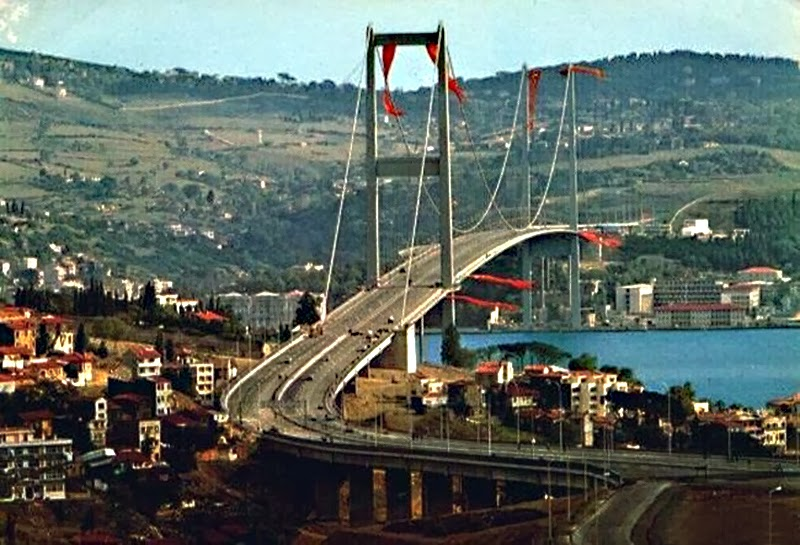

In [20]:
cv2_imshow(img)

In [22]:
def super_resolution(path_img, device, model):
  base = os.path.splitext(os.path.basename(path_img))[0]
  #print(base)
  img = cv2.imread(path_img)
  img = img * 1.0 / 255
  #print(img.shape)
  img = torch.from_numpy(np.transpose(img[:,:, [2,1,0]], (2,0,1))).float()
  #print(img.shape)
  LR = img.unsqueeze(0)
  #print(LR.shape)
  LR = LR.to(device)

  with torch.no_grad():
    result = model(LR).data.squeeze().float().cpu().clamp_(0, 1).numpy()
  result = np.transpose(result[[2,1,0], :, :], (1,2,0))
  result = (result * 255.0).round()
  cv2.imwrite('results/{:s}_sr.png'.format(base), result)
  return result

In [23]:
result_sr = super_resolution(name_img, device, model)
print(result_sr.shape)
cv2_imshow(result_sr)

In [ ]:
img = cv2.imread(name_img)
bicubic_result = cv2.resize(img, (0,0), fx = 4.0, fy = 4.0, interpolation=cv2.INTER_CUBIC)
cv2_imshow(bicubic_result)

In [ ]:
model_name = 'RRDB_PSNR_x4.pth'
model = load_model(model_name, models_dir, device)
result_sr = super_resolution(name_img, device, model)
print(result_sr.shape)
cv2_imshow(result_sr)

In [ ]:
result_small = cv2.resize(result_sr, (0,0), fx = 0.5, fy = 0.5)
print(result_small.shape)
cv2_imshow(result_small)

In [ ]:
directory = '/content/ESRGAN/LR/*'

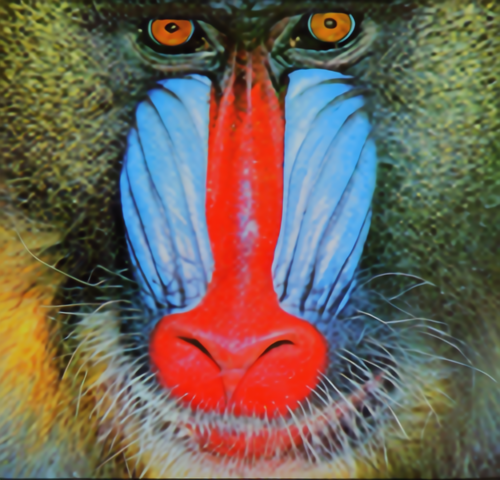

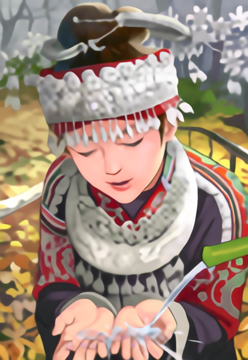

In [ ]:
for image in glob.glob(directory):
  result_sr = super_resolution(image, device, model)
  cv2_imshow(result_sr)